**Selected dataset**


A dataset was chosen for the Saudi marathons for the year 2023, which was taken from the kaggle website [Click here to go to the dataset](https://www.kaggle.com/datasets/majedalhulayel/riyadh-marathon-2023-results-saudi-arabia).

This data set contains 7 columns: rank, name, gender, nationality, category, cun time, and chip time also,it contains 12009 rows.

In [ ]:
import pandas as pd
import numpy as np

**Lodaing and exploring the dataset**

In [ ]:
df = pd.read_csv('/content/Riyadh Marathon 2023.csv', sep = ',')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12009 entries, 0 to 12008
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         11999 non-null  float64
 1   Name         12009 non-null  object 
 2   Gender       12009 non-null  object 
 3   Category     12009 non-null  object 
 4   Nationality  11947 non-null  object 
 5   Gun Time     11997 non-null  object 
 6   Chip Time    11181 non-null  object 
dtypes: float64(1), object(6)
memory usage: 656.9+ KB


In [ ]:
df.head()

,Rank,Name,Gender,Category,Nationality,Gun Time,Chip Time
0,1.0,42eb63b2-5dba-4030-bf6d-2b1f83ac611b,Female,4km,GBR,19:02,18:41
1,2.0,ab274d04-e39c-48d8-8dbd-4ecbce5cc95d,Female,4km,KSA,19:50,19:42
2,3.0,9b249d53-c90b-4b48-b23b-ec5f141ef44c,Female,4km,FRA,21:15,21:15
3,4.0,28e13d85-38d4-483c-b9cc-93b9bd9bde14,Female,4km,JOR,21:32,21:25
4,5.0,0a1c87a5-344e-4d27-9182-32f654230ebb,Female,4km,KSA,21:55,21:40


In [ ]:
df.tail()

,Rank,Name,Gender,Category,Nationality,Gun Time,Chip Time
12004,0.0,4e452f33-f457-4a85-b162-8bd2525d27ef,Male,Marathon,KSA,DNS,NaN
12005,0.0,71b836d3-8d7a-4744-bb89-23dc843009f4,Male,Marathon,KSA,DNS,NaN
12006,0.0,99a58f21-7a17-45b6-bbf0-659ee09b6495,Male,Marathon,KSA,DNS,5:29:20
12007,0.0,ea152733-39b8-405c-98d1-2a32d38c87c8,Male,Marathon,KSA,DNS,5:29:47
12008,NaN,e5e5ca44-730e-483c-94d9-62c1225b65b9,Male,Marathon,NaN,NaN,NaN


**Questions**

Before we cleaned the data, we asked a set of questions that we wanted to answer at the end of analyzing this data set. These questions will also help us in cleaning the data set, identifying the data we want, and getting rid of the data that does not mean anything to us in arriving at the answers to the questions asked.
The questions are:
* What are the top 10 nationalities participating in Saudi marathons?
* What are the 10 least nationalities participating in Saudi marathons?
* What gender has the most participation in Saudi marathons?
* What is the distribution of the ranking of females and males?
* What is the number of participants according to each category of the Saudi Marathons?
* There is a relationship between rank and gun time?

**Cleaning the dataset**

We have approximately 900 rows of data containing null values scattered between rank, nationality, gun time, and chip time, but most of the null values are in the two columns,gun time and chip time.We deleted the rows of data that contained null values at the time. At the time, we had 45 rows of data that contained null values in nationality. This data was filled with an “unknown” value because it is categorical data and we cannot calculate the median for it. Also, we cannot fill it with the most frequent value because it will become biased towards one nationality versus another.

In [ ]:
df.isnull().sum()

Rank            10
Name             0
Gender           0
Category         0
Nationality     62
Gun Time        12
Chip Time      828
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop(df[df['Gun Time'] == 'DNS'].index)
df

,Rank,Name,Gender,Category,Nationality,Gun Time,Chip Time
0,1.0,42eb63b2-5dba-4030-bf6d-2b1f83ac611b,Female,4km,GBR,19:02,18:41
1,2.0,ab274d04-e39c-48d8-8dbd-4ecbce5cc95d,Female,4km,KSA,19:50,19:42
2,3.0,9b249d53-c90b-4b48-b23b-ec5f141ef44c,Female,4km,FRA,21:15,21:15
3,4.0,28e13d85-38d4-483c-b9cc-93b9bd9bde14,Female,4km,JOR,21:32,21:25
4,5.0,0a1c87a5-344e-4d27-9182-32f654230ebb,Female,4km,KSA,21:55,21:40
...,...,...,...,...,...,...,...
11844,273.0,02115c21-878b-47b7-b677-be09213b8a47,Male,Marathon,KSA,6:16:43,5:44:34
11845,274.0,7a080d1a-6306-45e8-bed3-612276cd2f51,Male,Marathon,KSA,6:17:26,6:17:19
11846,275.0,849dbeb9-22d5-4684-991f-c3027d2e4c0d,Male,Marathon,ITA,6:18:43,6:18:38
11847,276.0,b22aac8b-f87c-4ed3-b911-14b3dd1e4304,Male,Marathon,FRA,6:18:43,6:18:39


In [ ]:
df = df.drop(df[df['Gun Time'] == 'DNF'].index)
df

,Rank,Name,Gender,Category,Nationality,Gun Time,Chip Time
0,1.0,42eb63b2-5dba-4030-bf6d-2b1f83ac611b,Female,4km,GBR,19:02,18:41
1,2.0,ab274d04-e39c-48d8-8dbd-4ecbce5cc95d,Female,4km,KSA,19:50,19:42
2,3.0,9b249d53-c90b-4b48-b23b-ec5f141ef44c,Female,4km,FRA,21:15,21:15
3,4.0,28e13d85-38d4-483c-b9cc-93b9bd9bde14,Female,4km,JOR,21:32,21:25
4,5.0,0a1c87a5-344e-4d27-9182-32f654230ebb,Female,4km,KSA,21:55,21:40
...,...,...,...,...,...,...,...
11844,273.0,02115c21-878b-47b7-b677-be09213b8a47,Male,Marathon,KSA,6:16:43,5:44:34
11845,274.0,7a080d1a-6306-45e8-bed3-612276cd2f51,Male,Marathon,KSA,6:17:26,6:17:19
11846,275.0,849dbeb9-22d5-4684-991f-c3027d2e4c0d,Male,Marathon,ITA,6:18:43,6:18:38
11847,276.0,b22aac8b-f87c-4ed3-b911-14b3dd1e4304,Male,Marathon,FRA,6:18:43,6:18:39


In [ ]:
df = df.drop(df[df['Gun Time'] == 'DSQ'].index)
df

,Rank,Name,Gender,Category,Nationality,Gun Time,Chip Time
0,1.0,42eb63b2-5dba-4030-bf6d-2b1f83ac611b,Female,4km,GBR,19:02,18:41
1,2.0,ab274d04-e39c-48d8-8dbd-4ecbce5cc95d,Female,4km,KSA,19:50,19:42
2,3.0,9b249d53-c90b-4b48-b23b-ec5f141ef44c,Female,4km,FRA,21:15,21:15
3,4.0,28e13d85-38d4-483c-b9cc-93b9bd9bde14,Female,4km,JOR,21:32,21:25
4,5.0,0a1c87a5-344e-4d27-9182-32f654230ebb,Female,4km,KSA,21:55,21:40
...,...,...,...,...,...,...,...
11844,273.0,02115c21-878b-47b7-b677-be09213b8a47,Male,Marathon,KSA,6:16:43,5:44:34
11845,274.0,7a080d1a-6306-45e8-bed3-612276cd2f51,Male,Marathon,KSA,6:17:26,6:17:19
11846,275.0,849dbeb9-22d5-4684-991f-c3027d2e4c0d,Male,Marathon,ITA,6:18:43,6:18:38
11847,276.0,b22aac8b-f87c-4ed3-b911-14b3dd1e4304,Male,Marathon,FRA,6:18:43,6:18:39


In [ ]:
df.dropna(subset = ['Gun Time', 'Chip Time'], inplace=True)
df

,Rank,Name,Gender,Category,Nationality,Gun Time,Chip Time
0,1.0,42eb63b2-5dba-4030-bf6d-2b1f83ac611b,Female,4km,GBR,19:02,18:41
1,2.0,ab274d04-e39c-48d8-8dbd-4ecbce5cc95d,Female,4km,KSA,19:50,19:42
2,3.0,9b249d53-c90b-4b48-b23b-ec5f141ef44c,Female,4km,FRA,21:15,21:15
3,4.0,28e13d85-38d4-483c-b9cc-93b9bd9bde14,Female,4km,JOR,21:32,21:25
4,5.0,0a1c87a5-344e-4d27-9182-32f654230ebb,Female,4km,KSA,21:55,21:40
...,...,...,...,...,...,...,...
11843,272.0,78208c2a-3b67-4c31-9f3c-0cc67e84ba59,Male,Marathon,JOR,6:15:57,6:15:41
11844,273.0,02115c21-878b-47b7-b677-be09213b8a47,Male,Marathon,KSA,6:16:43,5:44:34
11845,274.0,7a080d1a-6306-45e8-bed3-612276cd2f51,Male,Marathon,KSA,6:17:26,6:17:19
11846,275.0,849dbeb9-22d5-4684-991f-c3027d2e4c0d,Male,Marathon,ITA,6:18:43,6:18:38


In [ ]:
df_clean=df.fillna("Unknown")

In [ ]:
df_clean

,Rank,Name,Gender,Category,Nationality,Gun Time,Chip Time
0,1.0,42eb63b2-5dba-4030-bf6d-2b1f83ac611b,Female,4km,GBR,19:02,18:41
1,2.0,ab274d04-e39c-48d8-8dbd-4ecbce5cc95d,Female,4km,KSA,19:50,19:42
2,3.0,9b249d53-c90b-4b48-b23b-ec5f141ef44c,Female,4km,FRA,21:15,21:15
3,4.0,28e13d85-38d4-483c-b9cc-93b9bd9bde14,Female,4km,JOR,21:32,21:25
4,5.0,0a1c87a5-344e-4d27-9182-32f654230ebb,Female,4km,KSA,21:55,21:40
...,...,...,...,...,...,...,...
11843,272.0,78208c2a-3b67-4c31-9f3c-0cc67e84ba59,Male,Marathon,JOR,6:15:57,6:15:41
11844,273.0,02115c21-878b-47b7-b677-be09213b8a47,Male,Marathon,KSA,6:16:43,5:44:34
11845,274.0,7a080d1a-6306-45e8-bed3-612276cd2f51,Male,Marathon,KSA,6:17:26,6:17:19
11846,275.0,849dbeb9-22d5-4684-991f-c3027d2e4c0d,Male,Marathon,ITA,6:18:43,6:18:38


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11116 entries, 0 to 11847
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         11116 non-null  float64
 1   Name         11116 non-null  object 
 2   Gender       11116 non-null  object 
 3   Category     11116 non-null  object 
 4   Nationality  11116 non-null  object 
 5   Gun Time     11116 non-null  object 
 6   Chip Time    11116 non-null  object 
dtypes: float64(1), object(6)
memory usage: 694.8+ KB


In [ ]:
df_clean.to_csv("Riyadh Marathon 2023 Cleaned.csv")

**Exploratory data analysis**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

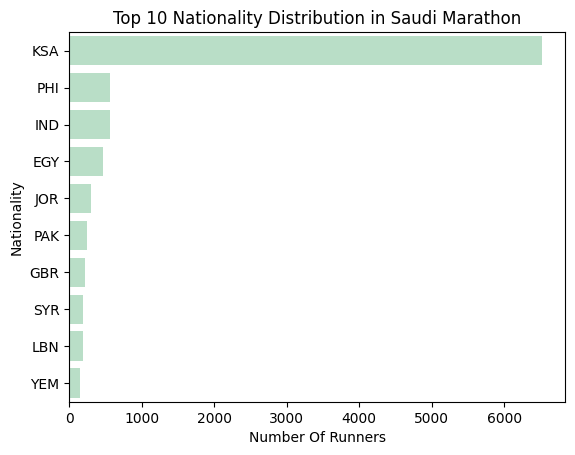

In [ ]:
data=df_clean['Nationality'].value_counts().sort_values(ascending=False).head(10)
green = '#B3E4C5'
sns.barplot(data=data,orient='h',color=green);
plt.title('Top 10 Nationality Distribution in Saudi Marathon')
plt.ylabel("Nationality")
plt.xlabel("Number Of Runners");

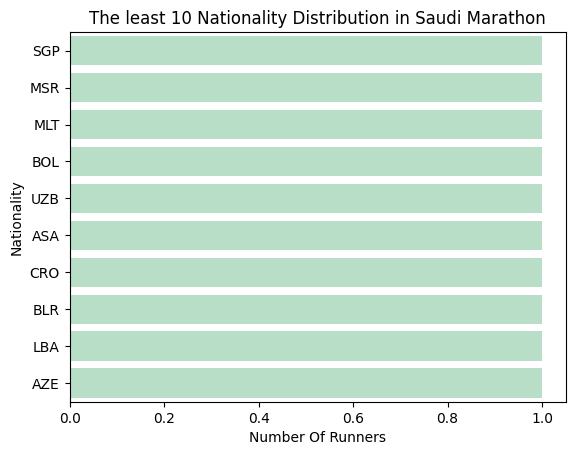

In [ ]:
data=df_clean['Nationality'].value_counts().sort_values(ascending=True).head(10)
sns.barplot(data=data,orient='h',color=green);
plt.title('The least 10 Nationality Distribution in Saudi Marathon')
plt.ylabel("Nationality")
plt.xlabel("Number Of Runners");

<ipython-input-14-65bf732b723c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_clean['Gender'].value_counts(),y=df_clean['Gender'].value_counts().index, palette=['skyblue', 'pink'],orient='h');


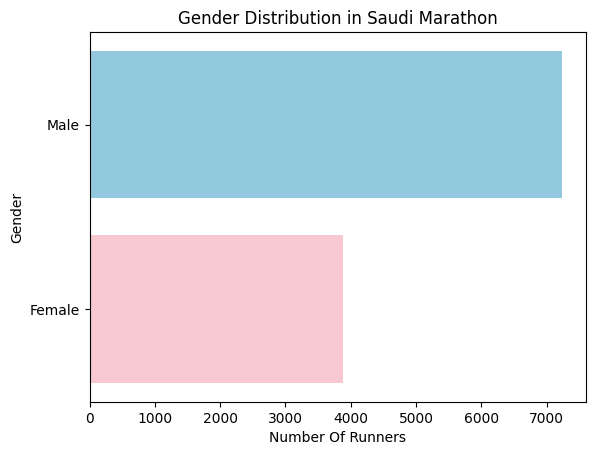

In [ ]:
sns.barplot(x=df_clean['Gender'].value_counts(),y=df_clean['Gender'].value_counts().index, palette=['skyblue', 'pink'],orient='h');
plt.title('Gender Distribution in Saudi Marathon');
plt.ylabel("Gender");
plt.xlabel("Number Of Runners");

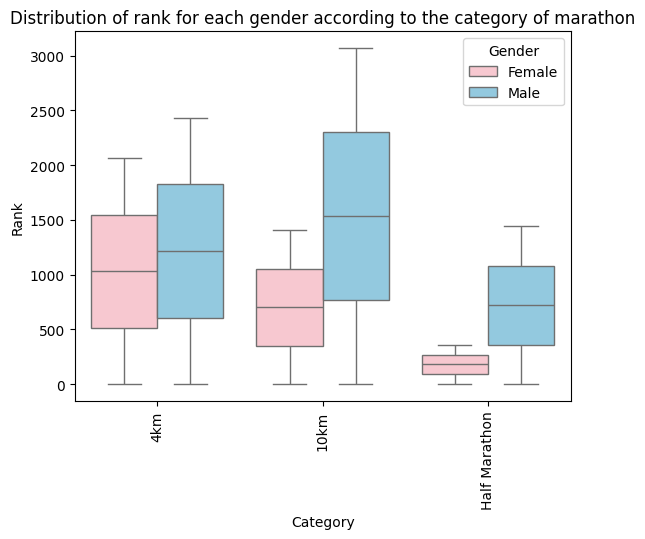

In [ ]:
categories_of_interest = ['4km', '10km', 'Half Marathon']
filtered_df = df_clean[df_clean['Category'].isin(categories_of_interest)]
sns.boxplot( y=df_clean['Rank'],x=filtered_df['Category'],hue=df_clean['Gender'],palette=["pink", "skyblue"]);
plt.xticks(rotation=90 );
plt.title('Distribution of rank for each gender according to the category of marathon');





(1.0, 280.0)

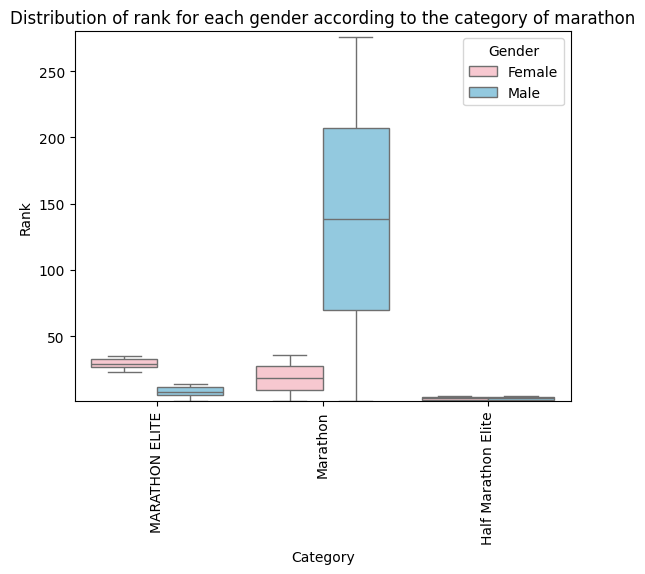

In [ ]:
categories_of_interest = ['Half Marathon Elite', 'MARATHON ELITE', 'Marathon']
filtered_df = df_clean[df_clean['Category'].isin(categories_of_interest)]
sns.boxplot( y=df_clean['Rank'],x=filtered_df['Category'],hue=df_clean['Gender'],palette=["pink", "skyblue"]);
plt.xticks(rotation=90 );
plt.title('Distribution of rank for each gender according to the category of marathon');
plt.ylim(1, 280)


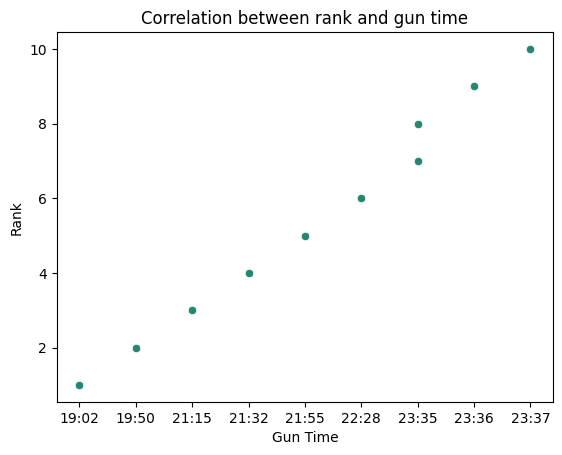

In [ ]:
sns.scatterplot(y=df_clean['Rank'].head(10), x=df_clean['Gun Time'].head(10),color='#258671');
plt.title("Correlation between rank and gun time");

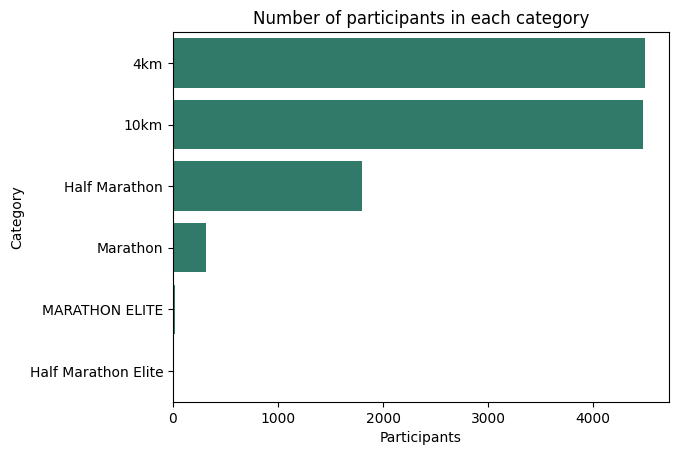

In [ ]:
data = df_clean['Category'].value_counts()
sns.barplot(data=data,orient='h',color='#258671');
plt.title("Number of participants in each category");
plt.xlabel("Participants")
plt.ylabel("Category");



In [ ]:
df_clean['Rank'].mode()

0    1.0
1    4.0
2    5.0
Name: Rank, dtype: float64

In [ ]:
df_clean['Rank'].mean()

1072.9686937747392

In [ ]:
df_clean['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [ ]:
df_clean['Nationality'].mode()

0    KSA
Name: Nationality, dtype: object

In [ ]:
df_clean.describe()

,Rank
count,11116.000000
mean,1072.968694
std,764.723375
min,1.000000
25%,415.000000
50%,971.000000
75%,1595.000000
max,3067.000000



**Conclusion**

At the end of analyzing this set of data, we arrived at a set of results:

* The most participating nationality in Saudi marathons is Saudi Arabia.
* The most common gender group participating in Saudi marathons is male.
* Females are more likely to obtain first ranks than males.
* There is an positive  relationship between rank and gun time.
* The most-participating category of marathons was the 4 km category.